**Diabetes Prediction**

Diabetes, also known as diabetes mellitus, is a chronic metabolic disorder characterized by high blood sugar levels (hyperglycemia) over a prolonged period. Insulin, a hormone produced by the pancreas, helps regulate blood sugar levels by allowing cells to absorb glucose from the bloodstream to use as energy. In individuals with diabetes, either the body does not produce enough insulin or the cells become resistant to insulin's effects, leading to elevated blood sugar levels.

**why diabetes prediction is important?**

Diabetes prediction is important for several reasons:

1. Early Intervention: Predicting diabetes allows for early identification of
individuals at risk, enabling healthcare providers to intervene promptly with preventive measures. Early detection can lead to lifestyle modifications, such as dietary changes, increased physical activity, and weight management, which can delay or prevent the onset of diabetes or its complications.

2. Preventive Healthcare: Diabetes prediction empowers individuals to take proactive steps to reduce their risk of developing the condition. By understanding their risk factors, individuals can make informed decisions about their lifestyle choices and seek appropriate medical advice and screening tests.

3. Reducing Healthcare Costs: Diabetes imposes significant economic burdens on healthcare systems due to its associated medical complications and treatments. Predictive models can help healthcare providers allocate resources more efficiently by identifying high-risk individuals for targeted interventions, thus potentially reducing healthcare costs associated with diabetes-related complications.

4. Improved Patient Outcomes: Early identification of individuals at risk of diabetes allows for timely implementation of preventive strategies and interventions. This can lead to improved health outcomes, including reduced incidence of diabetes, lower rates of complications, and improved quality of life for affected individuals.

5. Population Health Management: Diabetes prediction models can contribute to population health management efforts by identifying at-risk populations and tailoring public health interventions accordingly. This may include community-based education programs, screening initiatives, and policy interventions aimed at promoting healthier lifestyles and reducing diabetes prevalence at a population level.

6. Personalized Medicine: Predictive models can facilitate personalized healthcare by identifying individual risk factors and tailoring interventions to each person's specific needs and circumstances. This approach allows for more targeted and effective interventions, leading to better health outcomes for individuals at risk of diabetes.

**The goal is typically to develop a model that can accurately predict whether a person has diabetes based on various features or risk factors. The classification task involves assigning each instance (patient) to one of two classes: "diabetic" or "non-diabetic."**

**About Dataset**

**Context**


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**dataset** link: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

**dataset info**

**Pregnancies:** This tells us how many times a person has been pregnant. It's a simple count.

**Glucose:** This measures the amount of sugar in the blood. It's like checking how much sugar is dissolved in a person's blood.

**BloodPressure:** This measures the force of blood against the walls of blood vessels. It's like checking how hard the heart has to work to pump blood through the body.

**SkinThickness**: This measures the thickness of a fold of skin, usually on the triceps. It gives us an idea of a person's body composition.

**Insulin:** This measures the level of insulin in the blood. Insulin is a hormone that helps the body use sugar for energy.

**BMI (Body Mass Index):** This is a calculation based on a person's weight and height. It helps us understand if a person is underweight, normal weight, overweight, or obese.

**DiabetesPedigreeFunction:** This looks at the family history of diabetes. It helps us understand if a person is more likely to develop diabetes based on their family's medical history.

**Age:** This simply tells us how old the person is.

**Outcome:** This is the main point of interest. It tells us whether the person has diabetes or not. It's usually a "yes" or "no" answer.

**Importing Necessary Libraries**

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [112]:
import warnings
warnings.filterwarnings("ignore")

**Reading the data set**

In [113]:
df= pd.read_csv("/content/diabetes.csv")

In [114]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


**Data Wrangling(Data preprocessing)**

#**Data Assessing**

In [115]:
df.shape

(2000, 9)

In [116]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [119]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [120]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#**Data Cleaning**

In [121]:
#now we can see missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [122]:
df.drop_duplicates(inplace=True)

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
print("median values for outcome 0:\n",df[df["Outcome"]==0].median())
print("\n")
print("median values for outcome 1:\n",df[df["Outcome"]==1].median())

median values for outcome 0:
 Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                21.000
Insulin                      42.000
BMI                          30.100
DiabetesPedigreeFunction      0.338
Age                          27.000
Outcome                       0.000
dtype: float64


median values for outcome 1:
 Pregnancies                   4.000
Glucose                     139.000
BloodPressure                74.000
SkinThickness                27.000
Insulin                       0.000
BMI                          34.300
DiabetesPedigreeFunction      0.447
Age                          36.000
Outcome                       1.000
dtype: float64


#**Exploratory Data Analysis**

**Univariate Analysis**

In [125]:
df["Outcome"].value_counts()

0    491
1    253
Name: Outcome, dtype: int64

**we can see that most of the numerical features follows right skewed data**

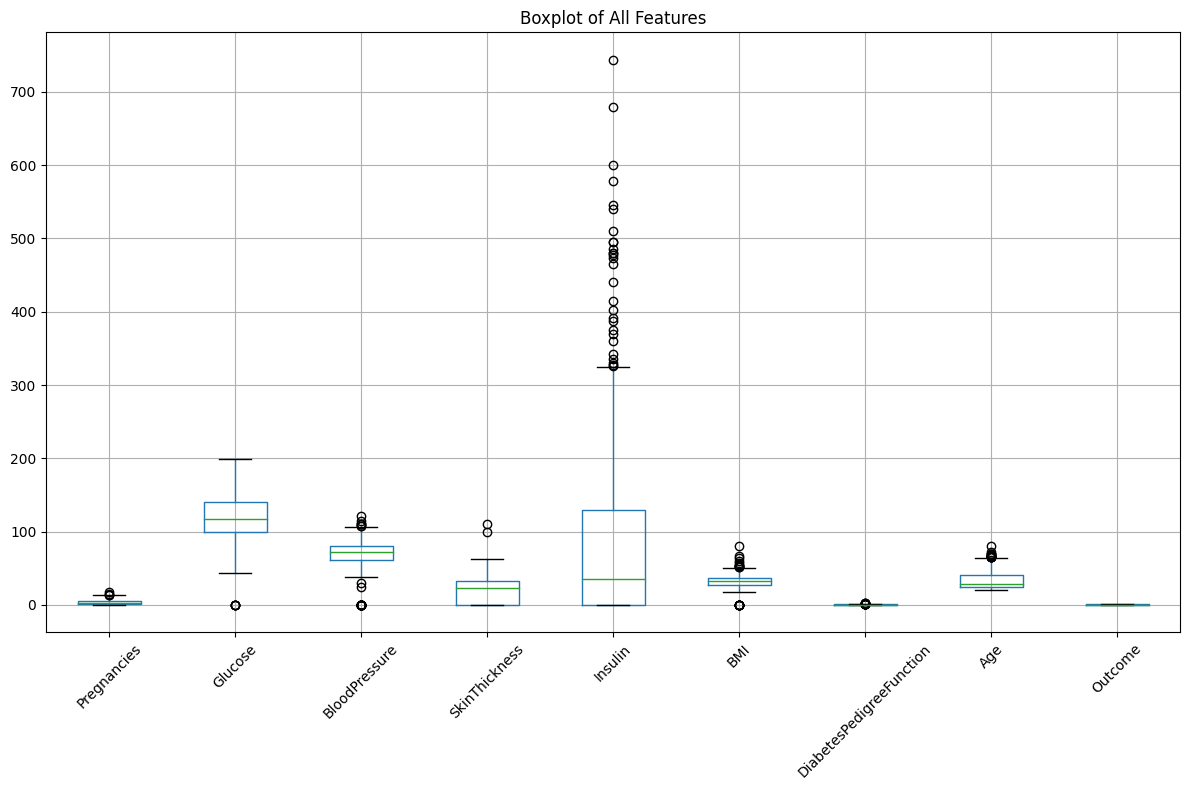

In [126]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Boxplot of All Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

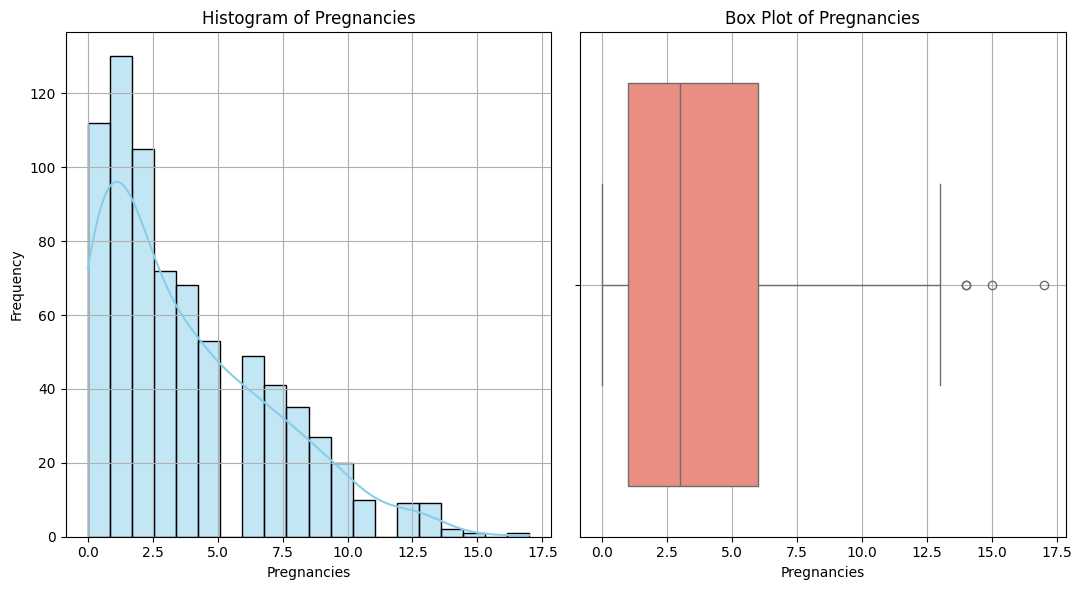

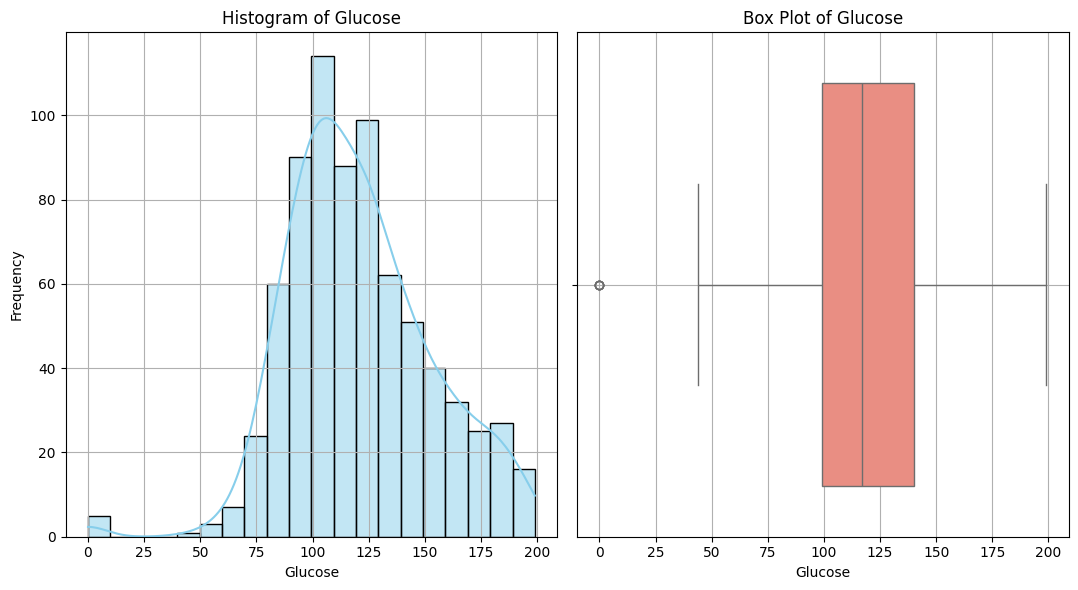

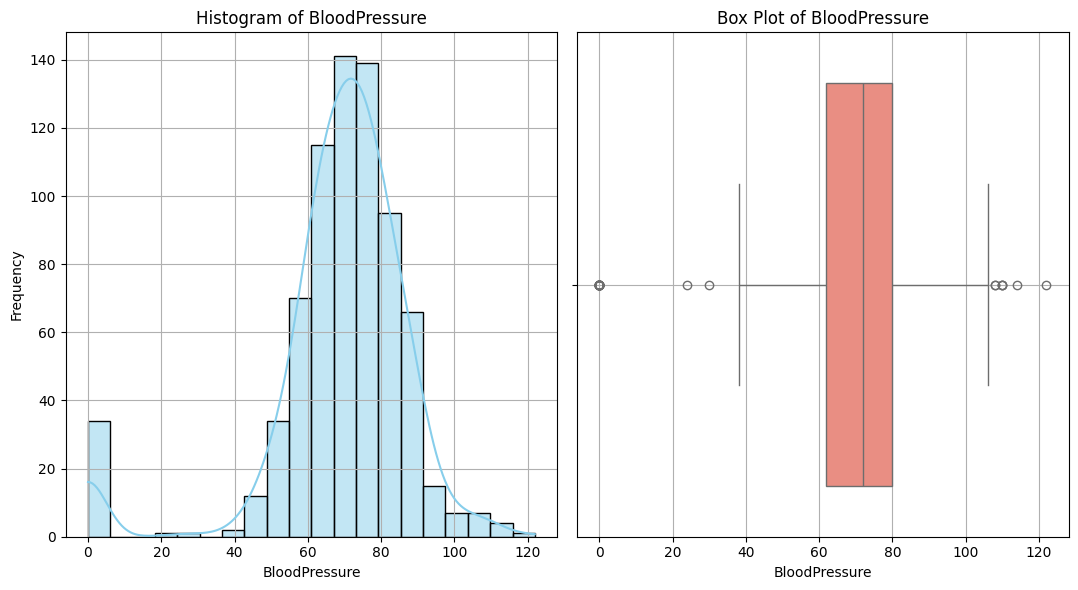

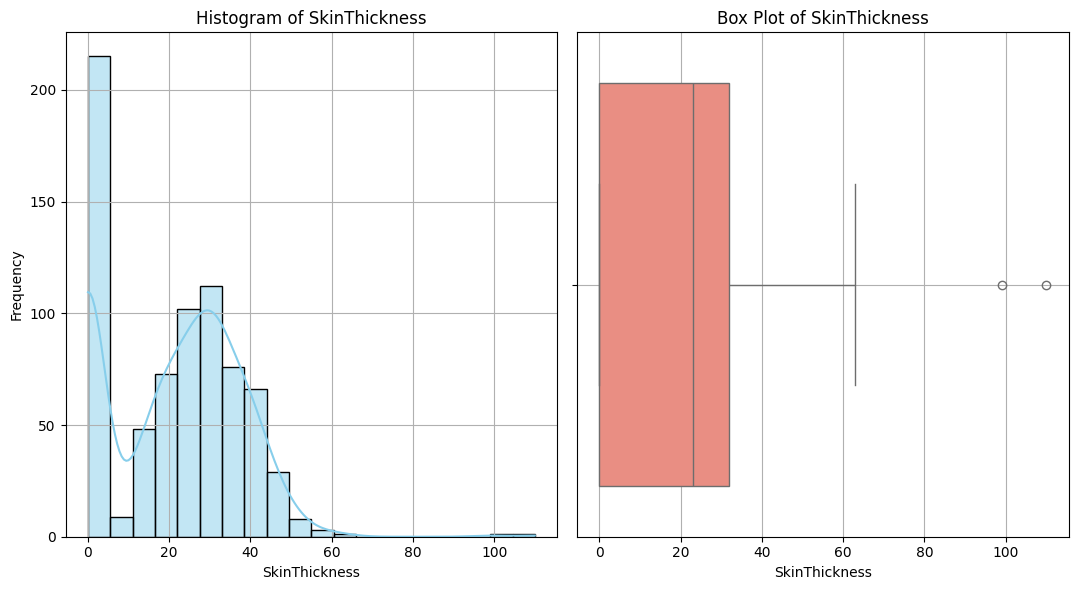

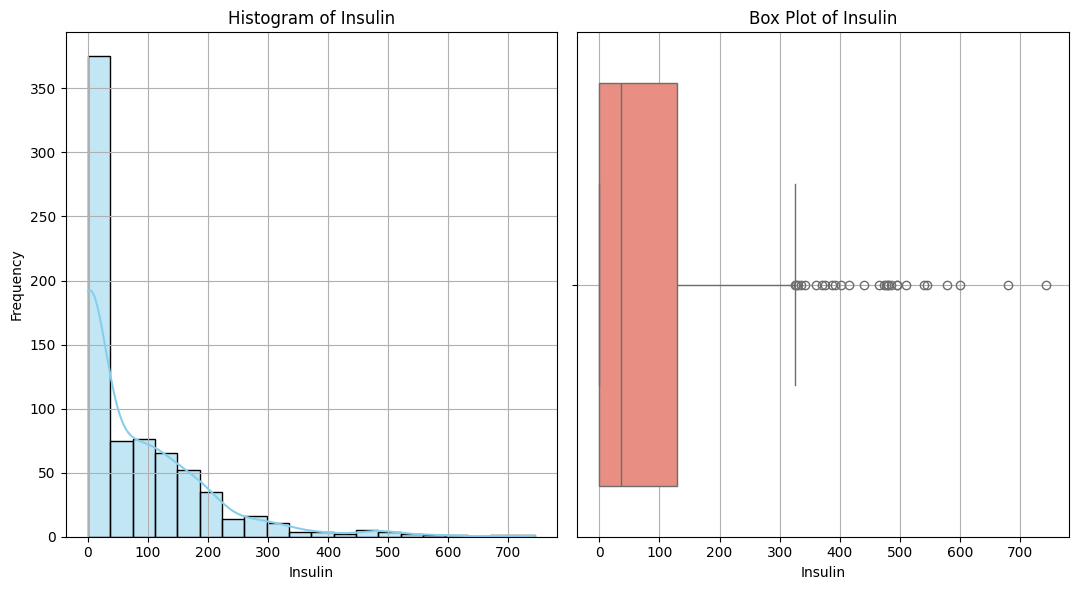

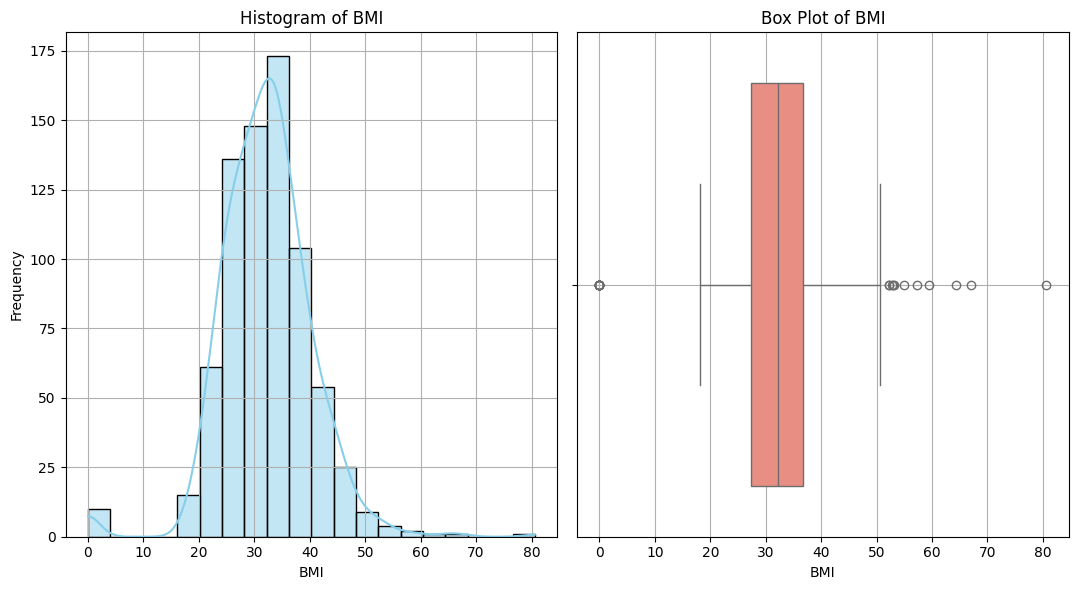

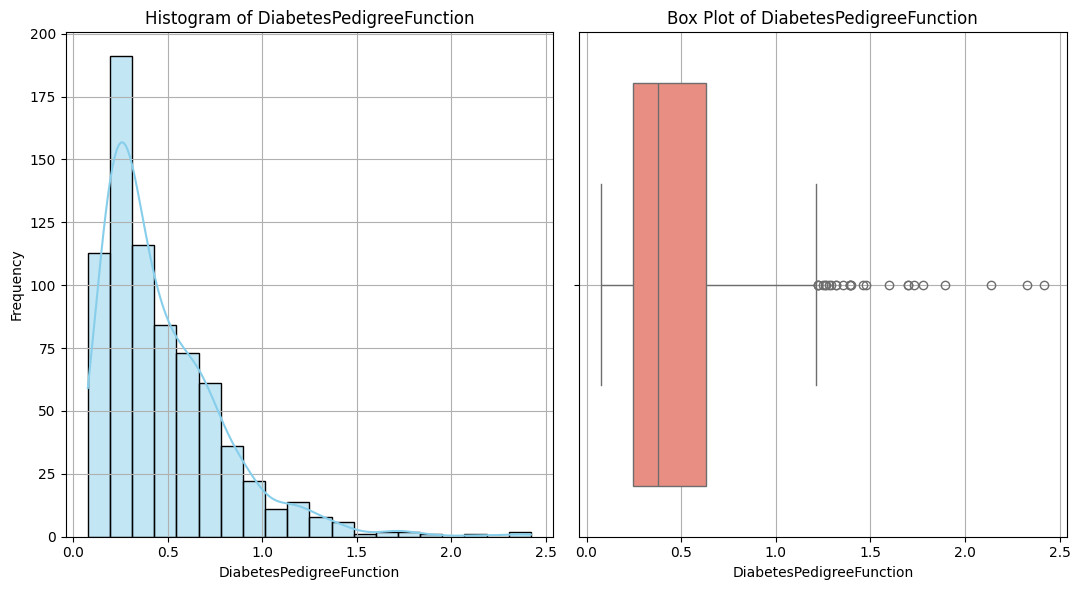

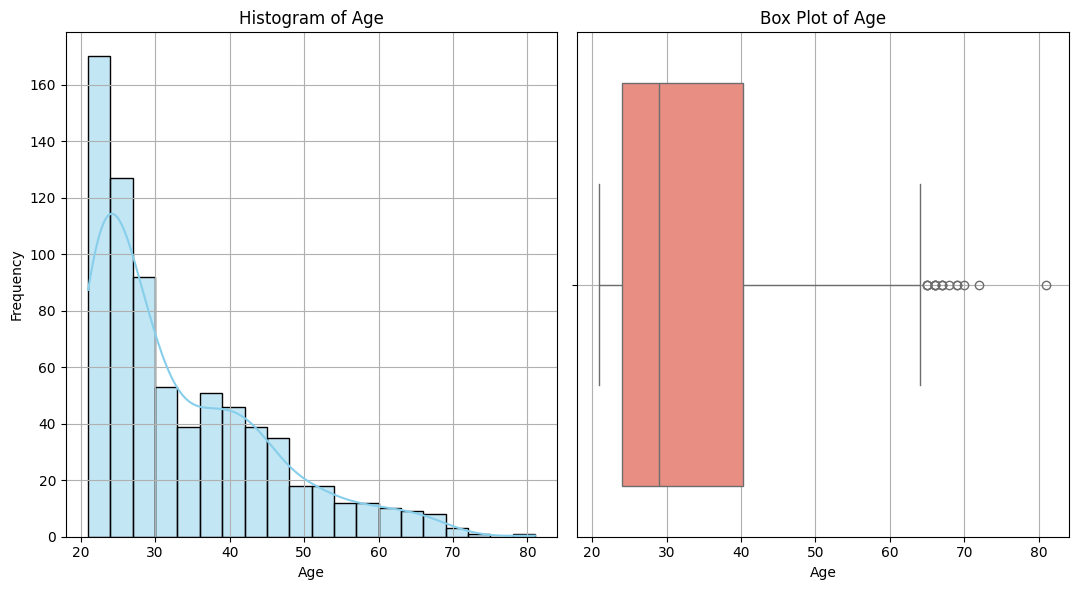

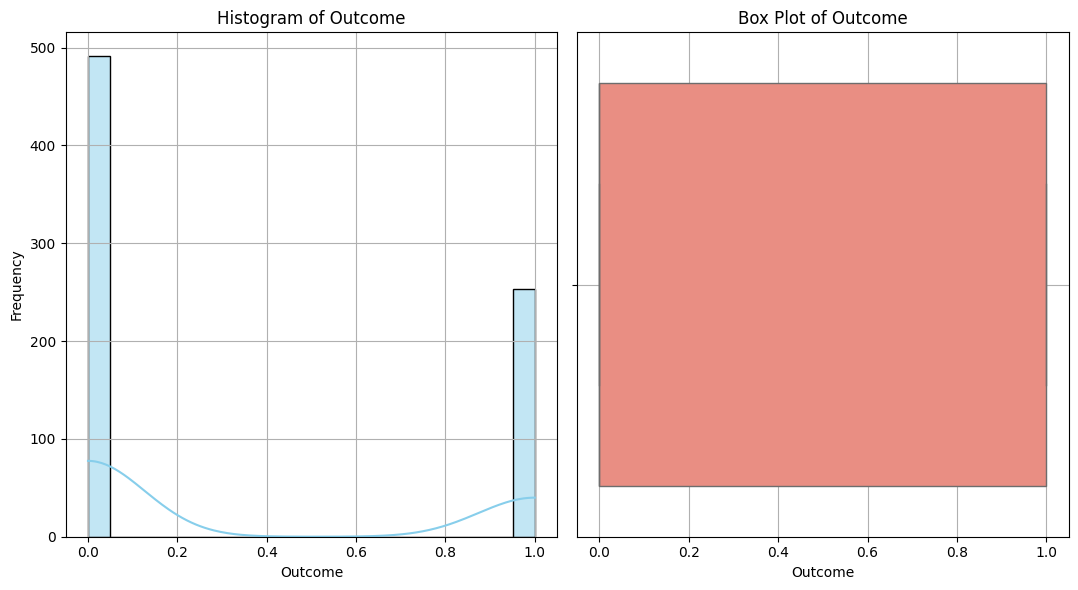

In [127]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column is numerical
    if df[column].dtype in ['int64', 'float64']:
        # Plot histogram, box plot, and KDE plot using seaborn
        plt.figure(figsize=(16,6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], bins=20, kde=True, color='skyblue')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)

        plt.subplot(1, 3, 2)
        sns.boxplot(data=df, x=column, color='salmon')
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    # Check if the column is categorical
    elif df[column].dtype == 'object':
        # Plot count plot using seaborn
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column, palette='viridis')
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()


<Axes: xlabel='Outcome', ylabel='count'>

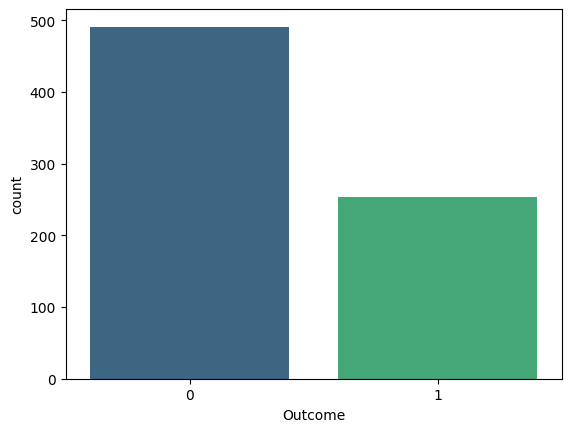

In [128]:
sns.countplot(data=df,x="Outcome",palette='viridis')

In [129]:
print("percentage of outcomes:\n",df["Outcome"].value_counts()/len(df)*100)

percentage of outcomes:
 0    65.994624
1    34.005376
Name: Outcome, dtype: float64


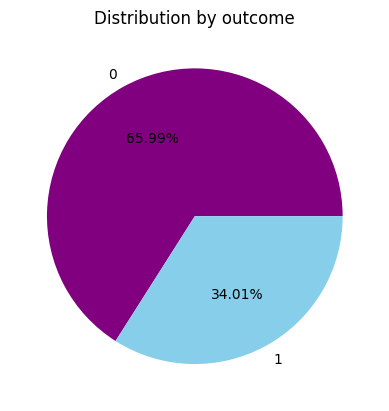

In [130]:
x=df["Outcome"].value_counts()
label = df["Outcome"].value_counts().index
plt.pie(x,labels=label,autopct="%1.2f%%",colors=["purple","skyblue"])
plt.title("Distribution by outcome")
plt.show()

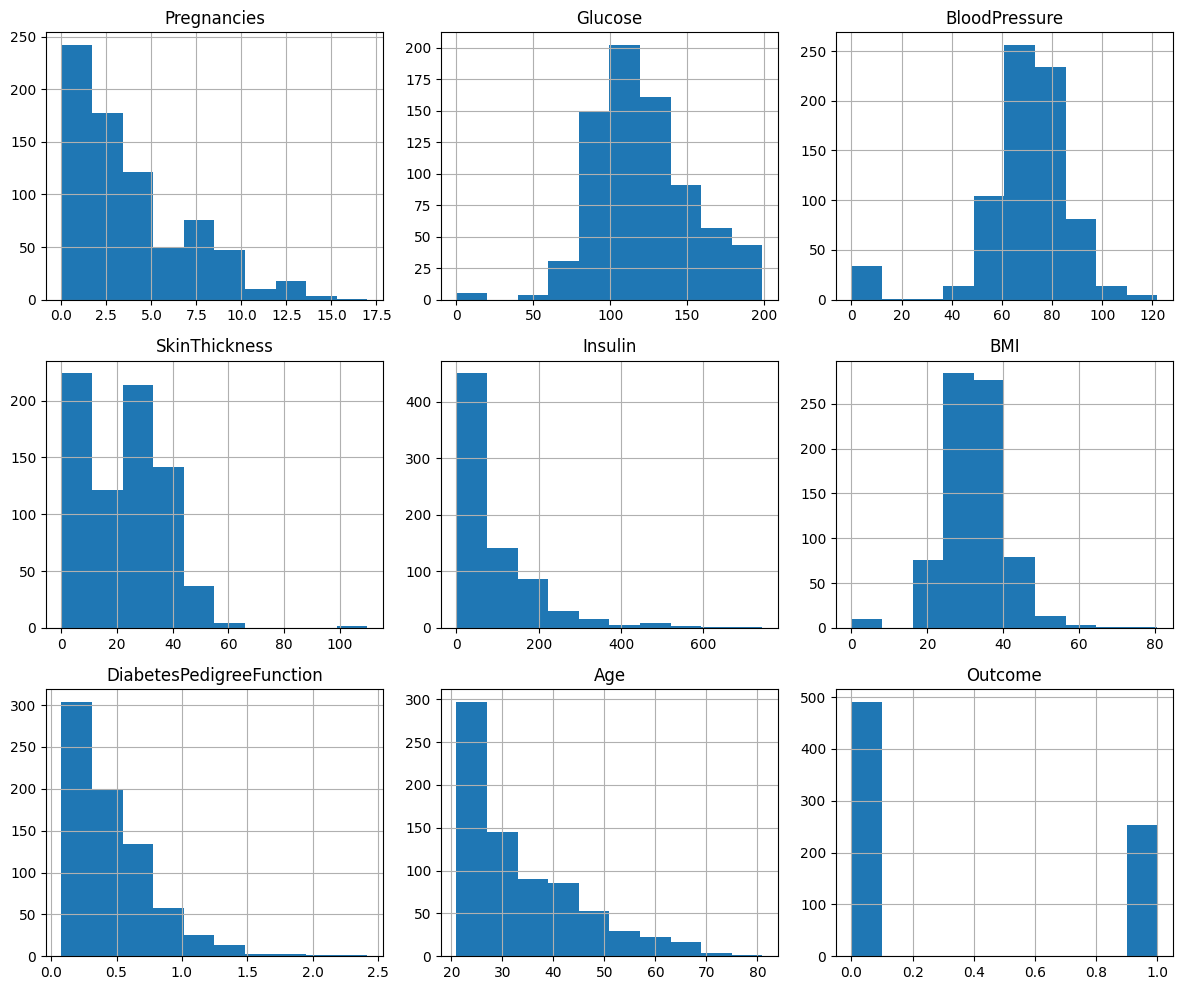

In [131]:
df.hist(figsize=(12, 10))  # Adjust figsize as needed
plt.tight_layout()  # Adjust layout
plt.show()

In [132]:
#changing column name DiabetesPedigreeFunction' to 'DPF'
df.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)

#**Filling missing Value**

In [133]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN

df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [134]:
df_copy.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     34
SkinThickness    215
Insulin          359
BMI               10
DPF                0
Age                0
Outcome            0
dtype: int64

In [135]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,744.0,3.752688,3.335541,0.000,1.000,3.0000,6.0000,17.00
Glucose,739.0,121.710419,30.456331,44.000,99.500,117.0000,141.0000,199.00
BloodPressure,710.0,72.261972,12.332675,24.000,64.000,72.0000,80.0000,122.00
SkinThickness,529.0,29.406427,11.137877,7.000,22.000,29.0000,36.0000,110.00
Insulin,385.0,153.698701,112.839569,14.000,76.000,126.0000,190.0000,744.00
BMI,734.0,32.668801,7.341531,18.200,27.500,32.4000,36.8000,80.60
DPF,744.0,0.472355,0.326181,0.078,0.244,0.3755,0.6325,2.42
Age,744.0,33.142473,11.751286,21.000,24.000,29.0000,40.2500,81.00
Outcome,744.0,0.340054,0.474046,0.000,0.000,0.0000,1.0000,1.00


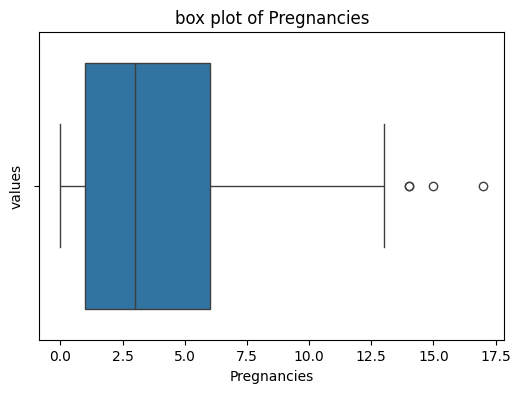

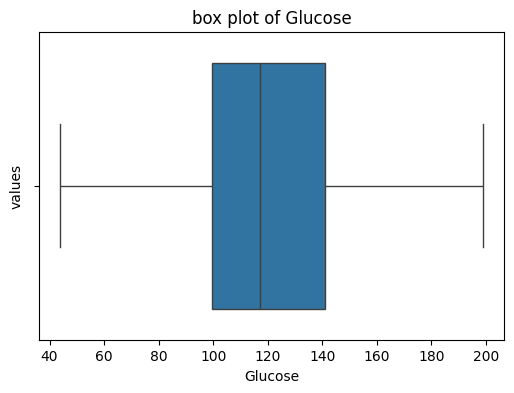

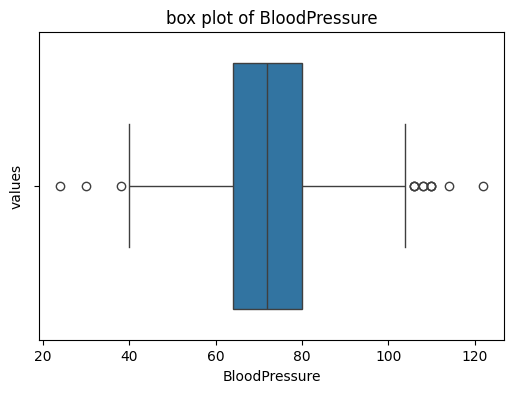

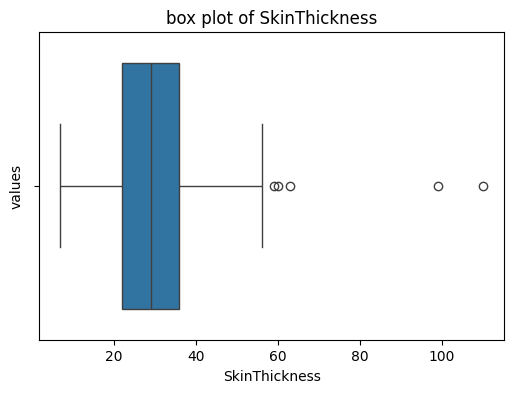

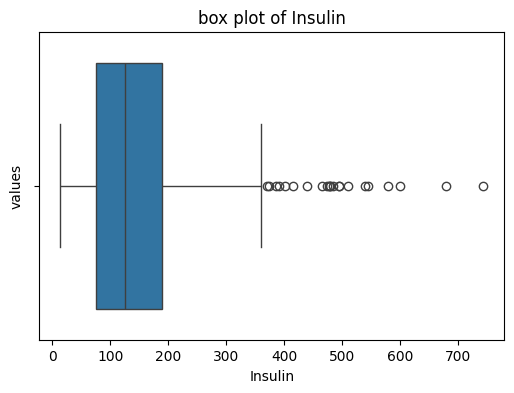

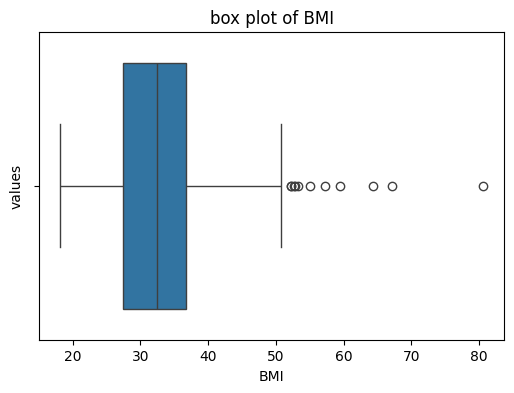

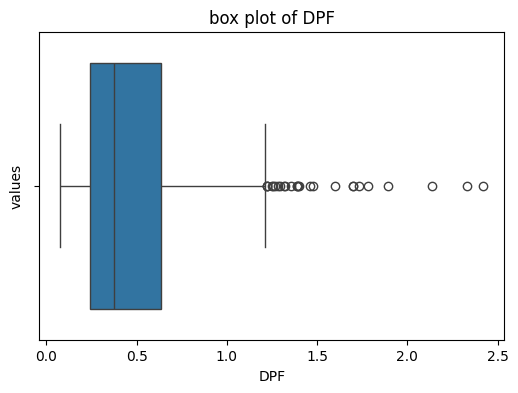

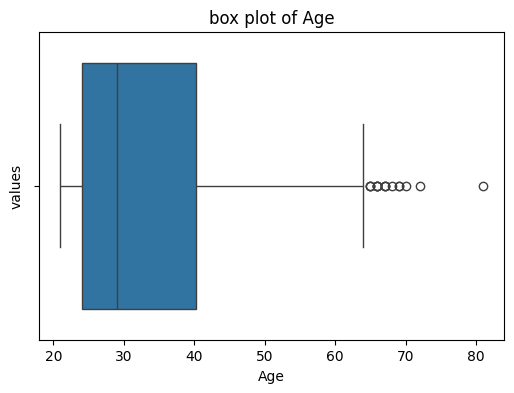

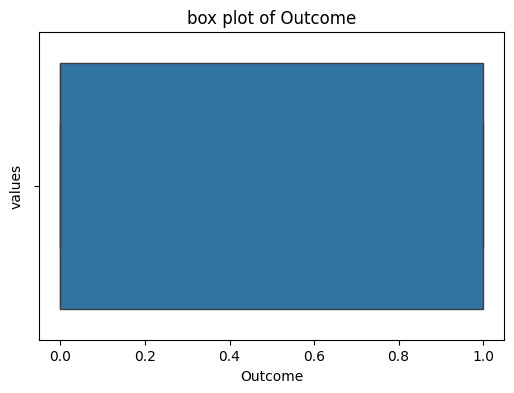

In [136]:
for col in df_copy.columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=df_copy,x=col)
  plt.title(f'box plot of {col}')
  plt.ylabel("values")
  plt.show()

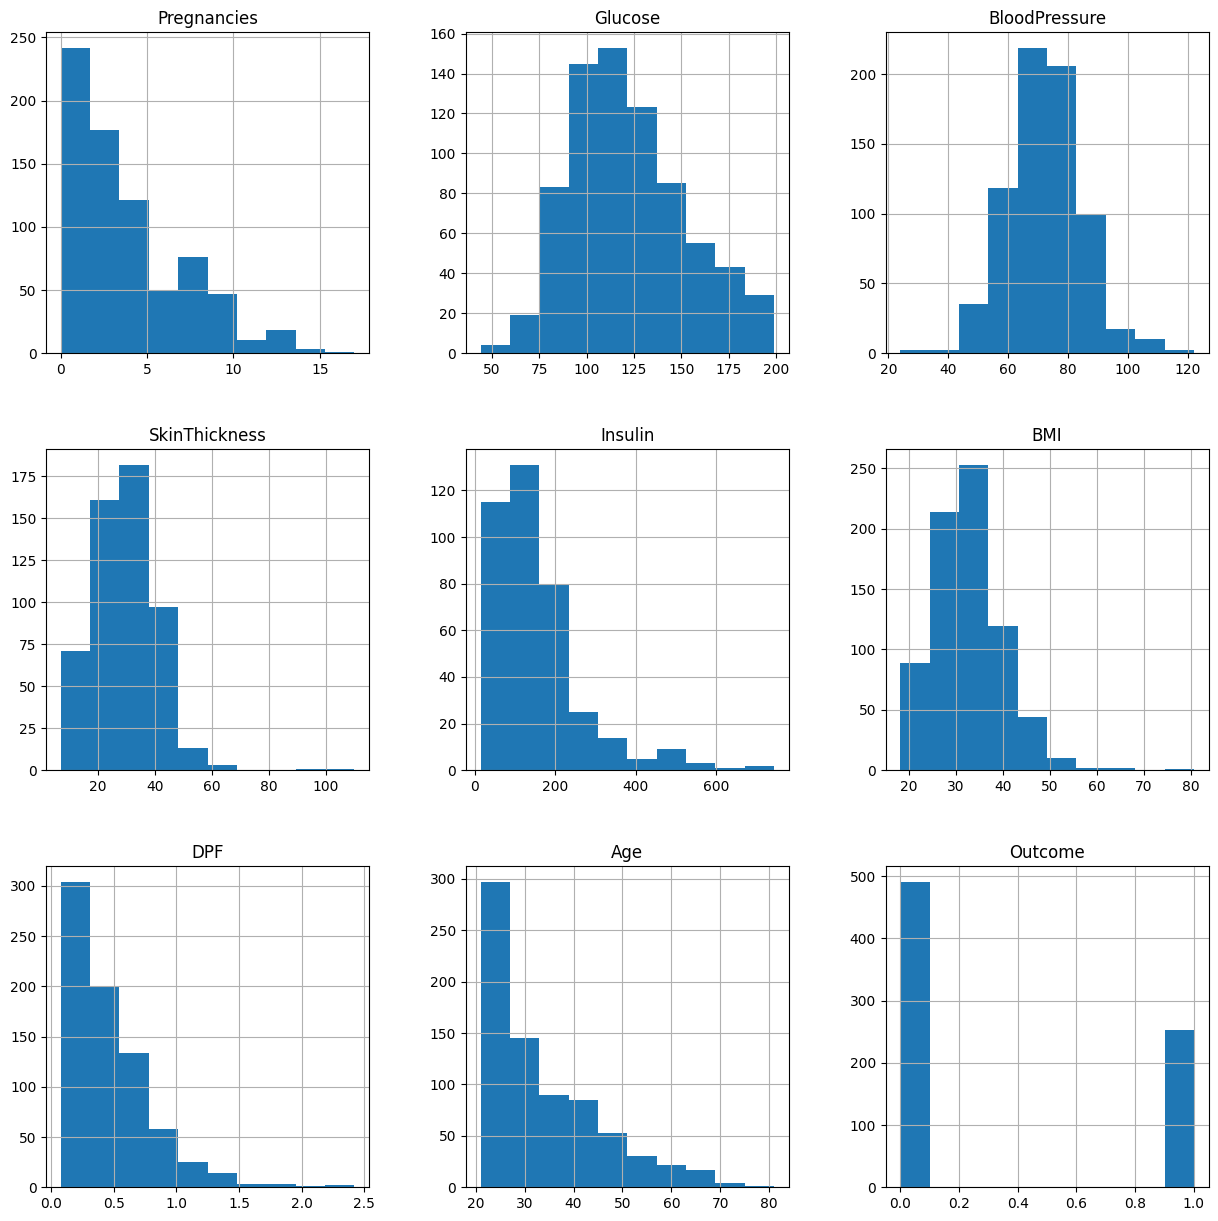

In [137]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
df_copy.hist(figsize = (15,15))
plt.show()

1. glucose NaN values can be filled with mean or median bcz it follows kind of normal distribution

2. blood pressure NaN values can be filled with mean or median bcz it follows kind of normal distribution

3. SkinThicknes  NaN values can be filled with median bcz it has right skewed data
4. Insulin has  outliers we have to remove them and fill the nan values but as we have less data so first we have to fill the missing values with median and remove outliers
5. BMI  NaN values can be filled with median bcz it has right skewed data

In [138]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [139]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [140]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,744.0,3.752688,3.335541,0.000,1.000,3.0000,6.0000,17.00
Glucose,744.0,121.710419,30.353681,44.000,100.000,117.5000,140.2500,199.00
BloodPressure,744.0,72.261972,12.047197,24.000,64.000,72.0000,80.0000,122.00
SkinThickness,744.0,29.288978,9.390932,7.000,25.000,29.0000,32.0000,110.00
Insulin,744.0,140.333333,82.294741,14.000,121.500,126.0000,130.0000,744.00
BMI,744.0,32.665188,7.292025,18.200,27.600,32.4000,36.8000,80.60
DPF,744.0,0.472355,0.326181,0.078,0.244,0.3755,0.6325,2.42
Age,744.0,33.142473,11.751286,21.000,24.000,29.0000,40.2500,81.00
Outcome,744.0,0.340054,0.474046,0.000,0.000,0.0000,1.0000,1.00


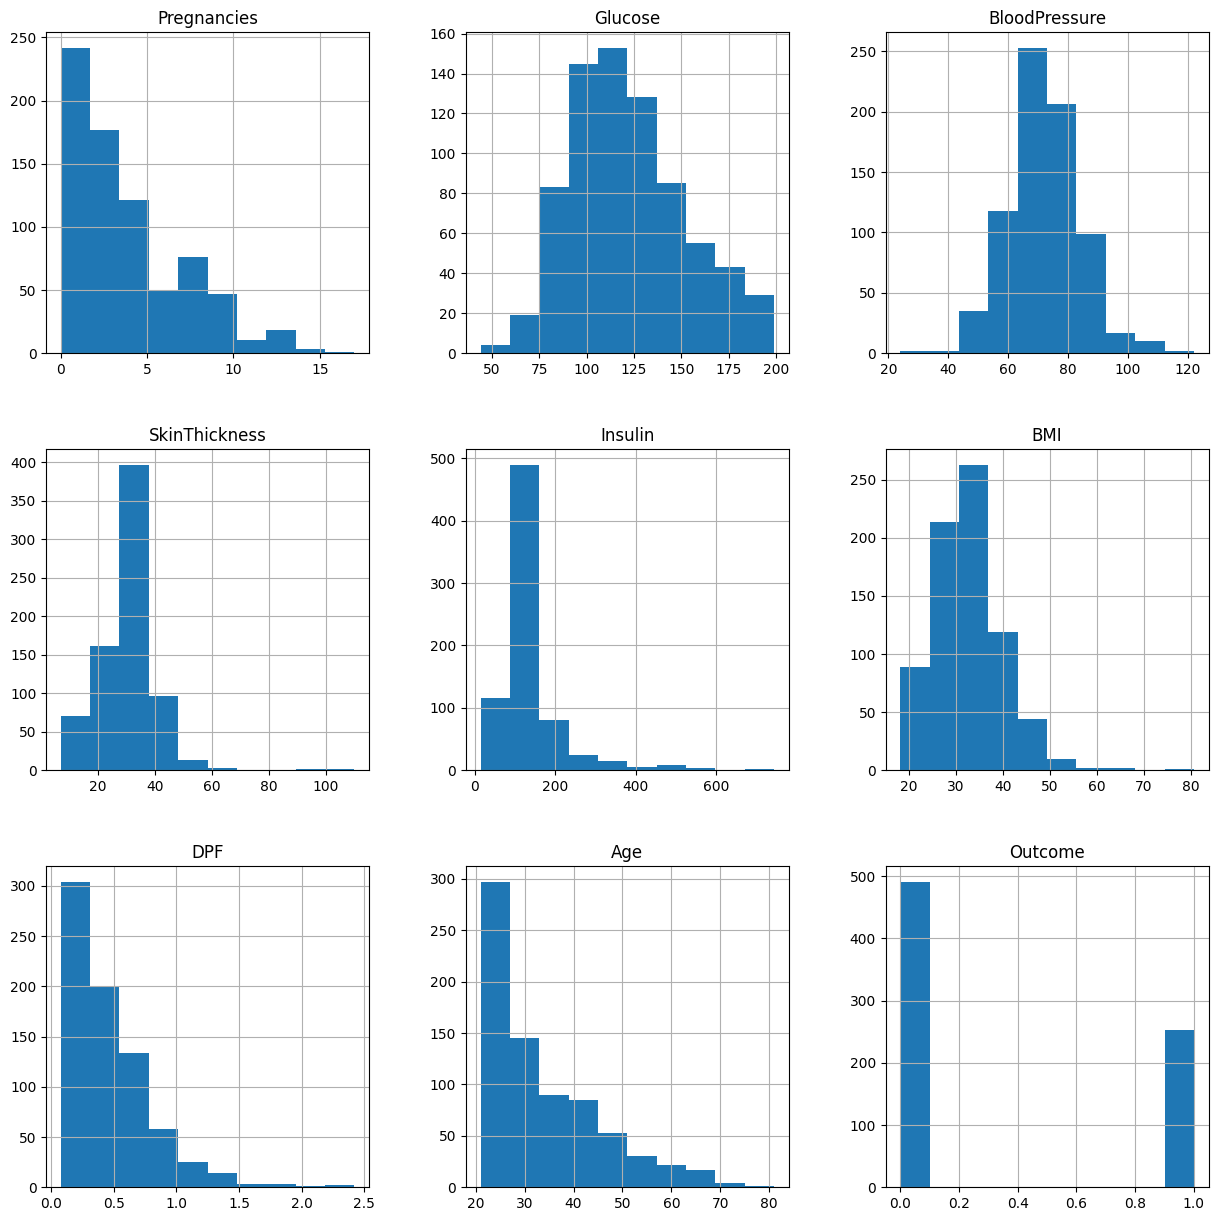

In [141]:
# Plotting histogram of dataset after replacing NaN values
df_copy.hist(figsize=(15,15))
plt.show()

#**Outliers**

**Removing outliers is important because it:**

**Maintains data accuracy by eliminating errors or extreme values.

Improves statistical measures by providing more accurate estimates.

Enhances model performance by reducing bias and overfitting.

Facilitates data interpretation by revealing clearer patterns.

Ensures that analysis assumptions are met, leading to valid results.

Simplifies data complexity, making analysis more manageable**

**To remove outliers using the Interquartile Range (IQR) method, you can follow these steps:**

1. Calculate the first quartile (Q1) and third quartile (Q3) of the data.
2. Compute the interquartile range (IQR) as the difference between Q3 and Q1.
3. Determine the lower bound as Q1 - 1.5 * IQR and the upper bound as Q3 + 1.5 * IQR.
4. Filter the data to include only values that fall within the lower and upper bounds.

In [142]:
def remove_outliers_IQR(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [143]:
new_df=remove_outliers_IQR(df_copy,'Insulin')

In [144]:
len(new_df["Insulin"])/len(df_copy["Insulin"])*100

56.72043010752689

**if we remove outliers of Insulin  then we will lose around 56 percent of our data**

**Winsorizing is a technique that involves capping extreme values in a dataset by replacing them with less extreme values**

**Winsorizing involves capping extreme values by replacing them with less extreme values. Instead of removing outliers entirely, Winsorizing replaces outliers with the nearest non-outlier value. This approach can help mitigate the impact of outliers without losing information.**

**Advantages of Winsorizing:**

1. Preserves Sample Size: Unlike trimming, Winsorizing retains all data points in the dataset by capping extreme values. This helps preserve the sample size and avoids the loss of information associated with trimming.

2. Robustness: Winsorizing is robust to the presence of outliers and can effectively mitigate their impact on statistical analyses. It provides a compromise between outlier removal and preservation of the original data distribution.

3. Customizability: Winsorizing allows for greater flexibility in controlling the extent of outlier treatment by adjusting the Winsorizing boundaries. This can be particularly useful when dealing with datasets with varying degrees of skewness or outliers.

In [145]:
# Function to perform Winsorizing on specific features
def winsorize_outliers(df, column_names, trim_fraction=0.05):
    winsorized_df = df_copy.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for column_name in column_names:
        # Calculate Winsorizing boundaries
        lower_bound = df[column_name].quantile(trim_fraction)
        upper_bound = df[column_name].quantile(1 - trim_fraction)

        # Winsorize the outliers
        winsorized_df[column_name] = winsorized_df[column_name].clip(lower=lower_bound, upper=upper_bound)

    return winsorized_df

In [146]:
# Perform Winsorizing on 'Feature1' and 'Feature2' columns in DataFrame df
new_df1 = winsorize_outliers(df_copy, ['Insulin','BMI','SkinThickness'])

In [147]:
#new dataframe
new_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,744.0,3.752688,3.335541,0.000,1.000,3.0000,6.0000,17.000
Glucose,744.0,121.710419,30.353681,44.000,100.000,117.5000,140.2500,199.000
BloodPressure,744.0,72.261972,12.047197,24.000,64.000,72.0000,80.0000,122.000
SkinThickness,744.0,29.038978,7.792582,14.150,25.000,29.0000,32.0000,44.850
Insulin,744.0,134.477957,56.188915,50.000,121.500,126.0000,130.0000,292.700
BMI,744.0,32.482258,6.358124,22.215,27.600,32.4000,36.8000,45.285
DPF,744.0,0.472355,0.326181,0.078,0.244,0.3755,0.6325,2.420
Age,744.0,33.142473,11.751286,21.000,24.000,29.0000,40.2500,81.000
Outcome,744.0,0.340054,0.474046,0.000,0.000,0.0000,1.0000,1.000


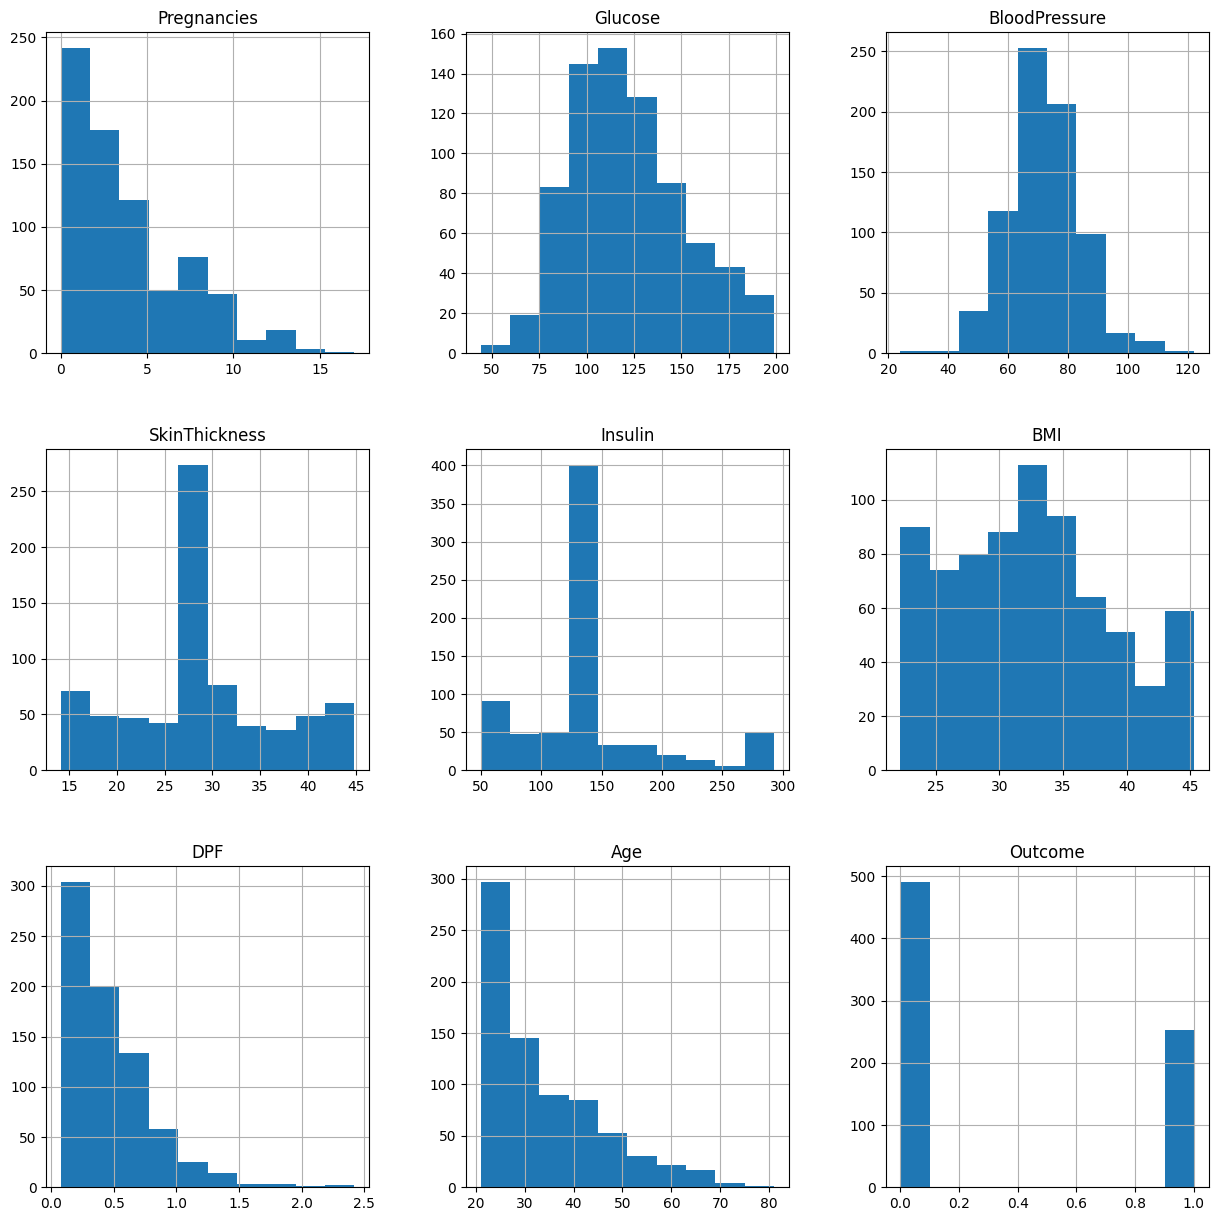

In [148]:
new_df1.hist(figsize = (15,15))
plt.show()

#**Model Building**

In [149]:
from sklearn.model_selection import train_test_split

X=new_df1.drop(columns="Outcome")
y = new_df1["Outcome"]

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (595, 8), X_test size: (149, 8)


In [151]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [153]:
classifier = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)

# Fit the pipeline on the training data
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300, random_state=42)

#**Model Evaluation**

In [154]:
# Make predictions on the test data
y_pred2 = classifier.predict(X_test)

# Accuracy score
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy2:", accuracy2)

Accuracy2: 0.8120805369127517


In [155]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       101
           1       0.76      0.60      0.67        48

    accuracy                           0.81       149
   macro avg       0.80      0.76      0.77       149
weighted avg       0.81      0.81      0.81       149



In [156]:
cm = confusion_matrix(y_test,y_pred2)
print(cm)

[[92  9]
 [19 29]]


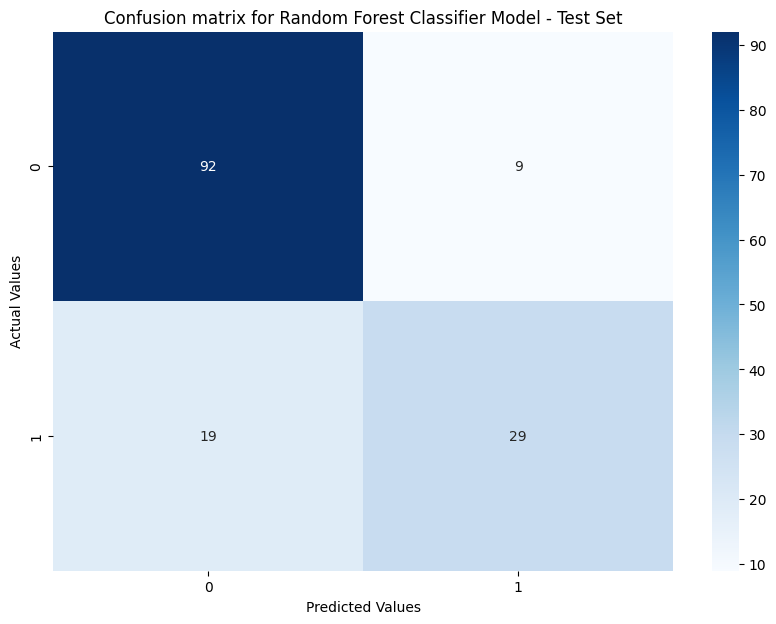

In [157]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**Predictions**

In [158]:
#creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)
    return classifier.predict(x)

prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]

if prediction:
  print("Oops! you have diabetes")
else:
  print("Great! you dont have diabetes.")


Great! you dont have diabetes.


In [159]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age

prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]

if prediction:
  print("Oops! you have diabetes")
else:
  print("Great! you dont have diabetes.")

Great! you dont have diabetes.


In [160]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age

prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]

if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Oops! You have diabetes.


In [161]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age

prediction = predict_diabetes(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]

if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [162]:
import pickle

In [163]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [164]:
pickle.dump(classifier,open("classifier.pkl","wb"))

#**Model Deployment**

In [165]:
import streamlit as st
import pickle

# Load the trained classifier
with open('classifier.pkl', 'rb') as f:
    classifier = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    sc = pickle.load(f)


def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    skint = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, skint, insulin, bmi, dpf, age]]
    x = sc.transform(x)

#use the loaded classifier to make predictions
    prediction = classifier.predict(x)[0]
    return prediction

# Streamlit app
st.title("Diabetes Prediction App")

# Input fields for user to provide information
st.header("enter patient details:")

pregnancies = st.slider("Pregnancies", min_value=0, max_value=20, value=0)
glucose = st.slider("Glucose", min_value=0, max_value=300, value=0)
blood_pressure = st.slider("Blood Pressure", min_value=0, max_value=200, value=0)
skin_thickness = st.slider("Skin Thickness", min_value=0, max_value=100, value=0)
insulin = st.slider("Insulin", min_value=0, max_value=1000, value=0)
bmi = st.slider("BMI", min_value=0.0, max_value=60.0, value=0.0, step=0.1)
dpf = st.slider("Diabetes Pedigree Function", min_value=0.0, max_value=2.0, value=0.0, step=0.01)
age = st.slider("Age", min_value=0, max_value=120, value=0)

#predict button

if st.button("predict"):
    prediction = predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age)
    if prediction:
        st.error("Oops! you have diabetes")
    else:
        st.success("Great! you dont have diabetes.")

#**How to run streamlit on Google Collab**

1. enter  ! pip install streamlit -q

2. enter !wget -q -O - ipv4.icanhazip.com and you will get some number

3. create a new file app.py and paste the streamlit application

4. enter ! streamlit run app.py & npx localtunnel --port 8501
and you will get a link and enter that link and past the number of number 2 steps

In [166]:
! pip install streamlit -q

In [167]:
!wget -q -O - ipv4.icanhazip.com

34.134.53.243


In [168]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.134.53.243:8501

npx: installed 22 in 2.26s
your url is: https://chatty-banks-attend.loca.lt
  Stopping...
^C
